# **SMS SPAM CLASSIFIER**

# Importing Packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Data

In [5]:
fileurl = '/content/drive/MyDrive/Colab Notebooks/spam.csv'
sms=pd.read_csv(fileurl, encoding='latin-1')


In [6]:
sms.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1238,ham,"Dear relieved of westonzoyland, all going to p...",NaN,NaN,NaN
4307,ham,Ha ha - had popped down to the loo when you he...,NaN,NaN,NaN
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...,NaN,NaN,NaN
332,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
4474,ham,We will meet soon princess! Ttyl!,NaN,NaN,NaN


# Data Cleaning

In [7]:
sms.rename(columns={'v1':'Label', 'v2':'message'}, inplace= True)

In [8]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
sms.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms.describe()

,Label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
encoder = LabelEncoder()
sms['Label']=encoder.fit_transform(sms['Label'])  ## ham =0 , spam= 1

In [13]:
sms.duplicated().sum()

403

In [14]:
sms.drop_duplicates(keep='first',inplace=True)


In [15]:
sms['Label'].value_counts()

,count
Label,
0,4516
1,653


In [16]:
sms['Label'].describe()

,Label
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
len(sms['message'][0])

111

In [18]:
sms['message_length']= sms['message'].apply(lambda x : len(x))

In [19]:
sms.head()

,Label,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
sms[['Label', 'message_length']].describe()

,Label,message_length
count,5169.000000,5169.000000
mean,0.126330,78.977945
std,0.332253,58.236293
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,60.000000
75%,0.000000,117.000000
max,1.000000,910.000000


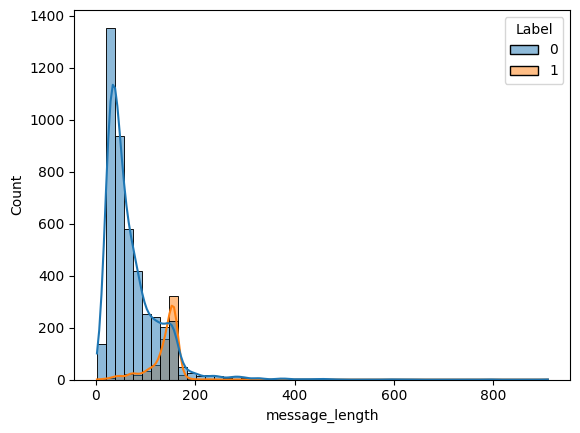

In [21]:
sns.histplot(data=sms,x=sms['message_length'], hue='Label' ,bins=50, kde=True)
plt.show()

In [22]:
sms[sms['Label']==1]['message_length'].describe()    # information of spam msg wrt msg_len  ## generally, spam messages quite longer

,message_length
count,653.000000
mean,137.891271
std,30.137753
min,13.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,224.000000


In [23]:
sms[sms['Label']==0]['message_length'].describe()# information of ham msg wrt msg_length

,message_length
count,4516.000000
mean,70.459256
std,56.358207
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


<Axes: xlabel='message_length', ylabel='Count'>

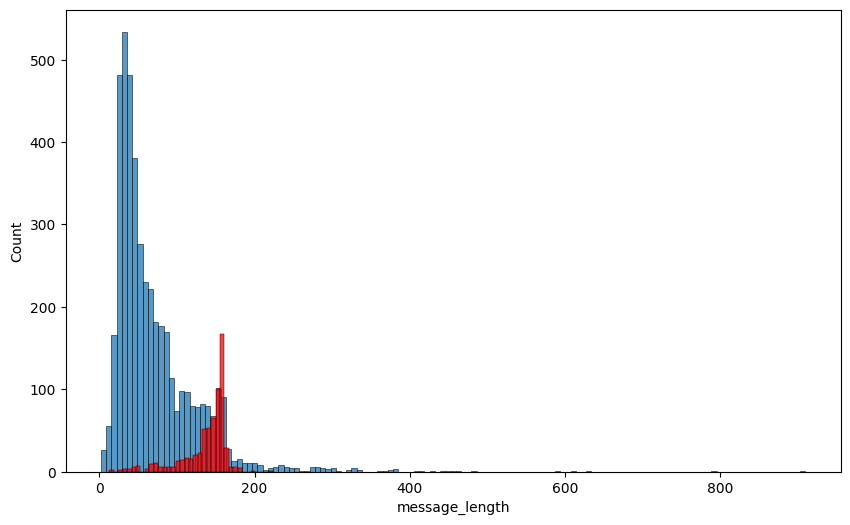

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(sms[sms['Label']==0]['message_length'])
sns.histplot(sms[sms['Label']==1]['message_length'],color='red')


In [25]:
sms[sms['message_length']==910]['message'].iloc[0] ## longest  but not spam

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [26]:
sms[sms['message_length']==244]['message'].iloc[0] ## longer and  spam

"Just so that you know,yetunde hasn't sent money yet. I just sent her a text not to bother sending. So its over, you dont have to involve yourself in anything. I shouldn't have imposed anything on you in the first place so for that, i apologise."

In [27]:
sms[['Label', 'message_length']].corr()

,Label,message_length
Label,1.000000,0.384717
message_length,0.384717,1.000000


In [28]:
spam_message=sms[sms['Label']==1]['message']

# Data Preprocessing

In [49]:


def text_processing(text):
    """
    Function to preprocess text by performing the following steps:
    1. Convert text to lowercase.
    2. Tokenize the text into individual words.
    3. Lemmatize the tokens to their base form.
    4. Remove stopwords (common words like 'is', 'the').
    5. Remove non-alphanumeric characters (like punctuation).

    Parameters:
    -----------
    text : str
        Input text to be preprocessed.

    Returns:
    --------
    str
        A cleaned and preprocessed version of the input text, with lemmatized tokens, no stopwords, and no special characters.
    """

    # Step 1: Convert the text to lowercase to ensure consistency
    text_lower = text.lower()

    # Step 2: Tokenize the text into individual words (list of words)
    text_list = word_tokenize(text_lower)

    # Step 3: Initialize the WordNetLemmatizer to reduce words to their base form
    lemmatizer = WordNetLemmatizer()

    # Step 4: Lemmatize each word if it's not a stopword
    # Only retain words that are not in the stopwords list
    text_list = [lemmatizer.lemmatize(word) for word in text_list if word not in stopwords.words('english')]

    # Step 5: Remove non-alphanumeric tokens (special characters, punctuation, etc.)
    text_list = [word for word in text_list if word.isalnum()]

    # Step 6: Join the list of words back into a single string
    # Return the cleaned, processed text
    return ' '.join(text_list)





In [30]:
sms['Transformed_msg']=sms['message'].apply(text_processing)

In [31]:
sms.head()

,Label,message,message_length,Transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though


In [32]:
sms_list=sms[sms['Label']==1]['Transformed_msg'].to_list()

In [33]:
word_sms_list=word_tokenize((' '.join(sms_list)))

## number of words in word_sms_list
j=0
for i in word_sms_list:
  j=j+1

print(j)

9939


In [34]:
from collections import Counter                     ## Counting the number of repeated words in the list
count_words=Counter(word_sms_list).most_common(30)
print(count_words)             ## returns the most common 30 words

[('call', 313), ('free', 191), ('2', 155), ('txt', 130), ('u', 126), ('text', 121), ('ur', 119), ('mobile', 114), ('stop', 104), ('claim', 98), ('reply', 97), ('4', 97), ('prize', 82), ('c', 80), ('get', 70), ('new', 64), ('service', 64), ('tone', 63), ('send', 58), ('urgent', 57), ('nokia', 54), ('phone', 52), ('cash', 51), ('contact', 51), ('week', 49), ('please', 49), ('win', 48), ('min', 45), ('customer', 42), ('guaranteed', 42)]


In [35]:
## converting the returned list into the dataframe

msg_df=pd.DataFrame(count_words, columns=['words','count'])

In [36]:
msg_df.head()

,words,count
0,call,313
1,free,191
2,2,155
3,txt,130
4,u,126


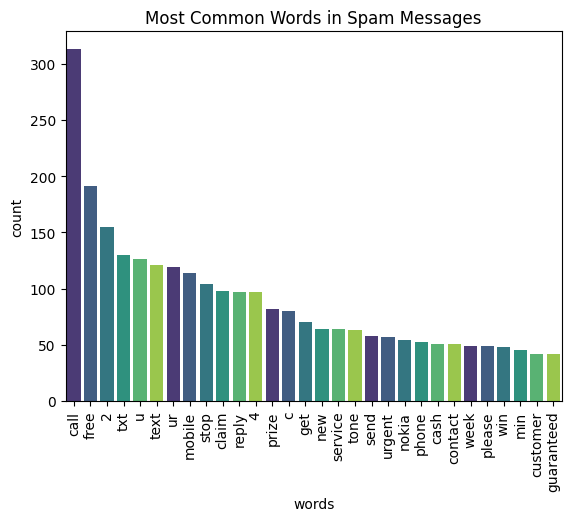

In [37]:
sns.barplot(x=msg_df['words'],y=msg_df['count'],palette=sns.color_palette("viridis"))
plt.xticks(rotation='vertical')

plt.title('Most Common Words in Spam Messages')
plt.show()

# Vectorization using Count Vectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer   ## Vectorization using CounterVecotizer
cv= CountVectorizer()
X = cv.fit_transform(sms['Transformed_msg']).toarray()
y=sms['Label']



In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:


def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained model on the test data by calculating key performance metrics and plotting the confusion matrix.

    This function performs the following steps:
    1. Makes predictions on the test data.
    2. Computes evaluation metrics: confusion matrix, accuracy, precision, recall, and F1-score.
    3. Prints the results to the console.
    4. Plots a heatmap of the confusion matrix for visual inspection.

    Parameters:
    -----------
    model : trained model object
        The trained machine learning model to be evaluated.

    X_test : array-like
        The test features on which the model will be evaluated.

    y_test : array-like
        The true labels for the test data.

    Returns:
    --------
    dict
        A dictionary containing the confusion matrix, accuracy, precision, recall, and F1 score.
    """

    # Step 1: Make predictions on the test data
    y_pred = model.predict(X_test)

    # Step 2: Compute the evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy score
    precision = precision_score(y_test, y_pred, average='weighted')  # Precision
    recall = recall_score(y_test, y_pred, average='weighted')  # Recall
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 score

    # Step 3: Print the evaluation metrics to the console
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nAccuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Step 4: Plot the confusion matrix
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,  # Plot the heatmap
                xticklabels=['ham', 'spam'],  # Labels for x-axis (Predicted Labels)
                yticklabels=['ham', 'spam'])  # Labels for y-axis (True Labels)
    plt.title('Confusion Matrix')  # Title of the plot
    plt.ylabel('True Label')  # y-axis label
    plt.xlabel('Predicted Label')  # x-axis label
    plt.show()  # Display the plot

    # Return the metrics as a dictionary for further use
    return {
        'confusion_matrix': conf_matrix,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


# Model Building

In [46]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

classifier_mnb= MultinomialNB()
classifier_gnb= GaussianNB()
classifier_bnb= BernoulliNB()



# Multinomial Naive Bayes

Confusion Matrix:
[[870  19]
 [ 10 135]]

Accuracy: 97.20%
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.88      0.93      0.90       145

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



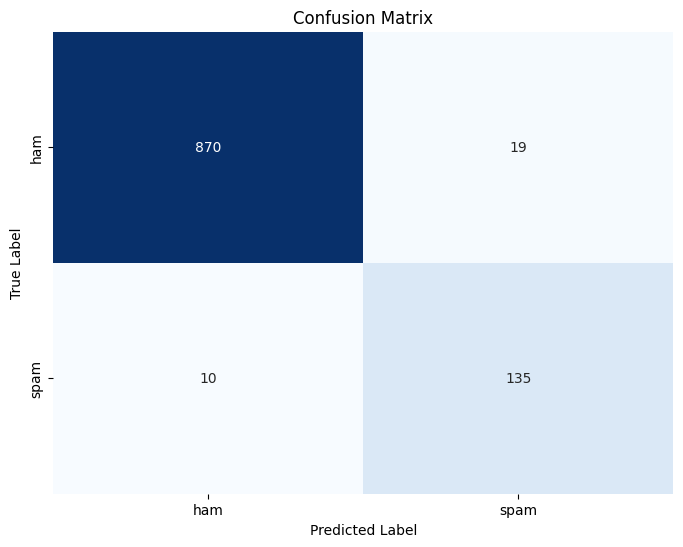

{'confusion_matrix': array([[870,  19],
        [ 10, 135]]),
 'accuracy': 0.971953578336557,
 'precision': 0.9729285463086236,
 'recall': 0.971953578336557,
 'f1_score': 0.9723043369029932}

In [51]:
classifier_mnb.fit(X_train, y_train)
evaluate_model(classifier_mnb, X_test, y_test)


# Gaussian Naive Bayes

Confusion Matrix:
[[787 102]
 [ 19 126]]

Accuracy: 88.30%
Precision: 0.92
Recall: 0.88
F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       889
           1       0.55      0.87      0.68       145

    accuracy                           0.88      1034
   macro avg       0.76      0.88      0.80      1034
weighted avg       0.92      0.88      0.89      1034



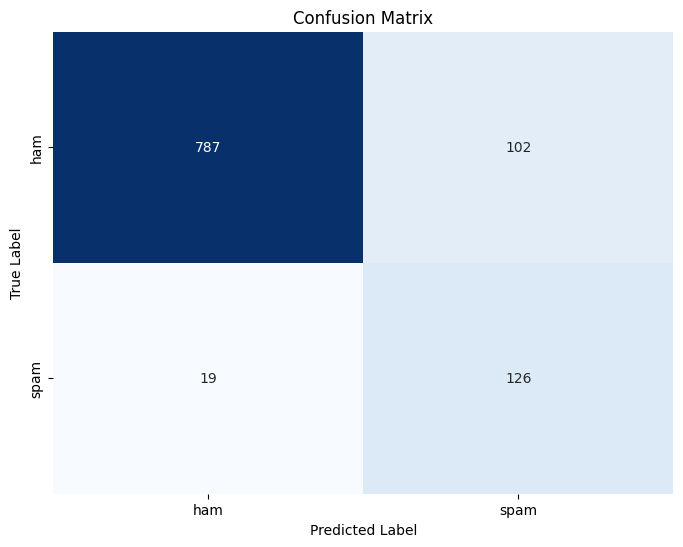

{'confusion_matrix': array([[787, 102],
        [ 19, 126]]),
 'accuracy': 0.8829787234042553,
 'precision': 0.9169971018036619,
 'recall': 0.8829787234042553,
 'f1_score': 0.8931333942115854}

In [52]:
classifier_gnb.fit(X_train,y_train)
evaluate_model(classifier_gnb, X_test, y_test)


# Bernoulli Naive Bayes

Confusion Matrix:
[[885   4]
 [ 33 112]]

Accuracy: 96.42%
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



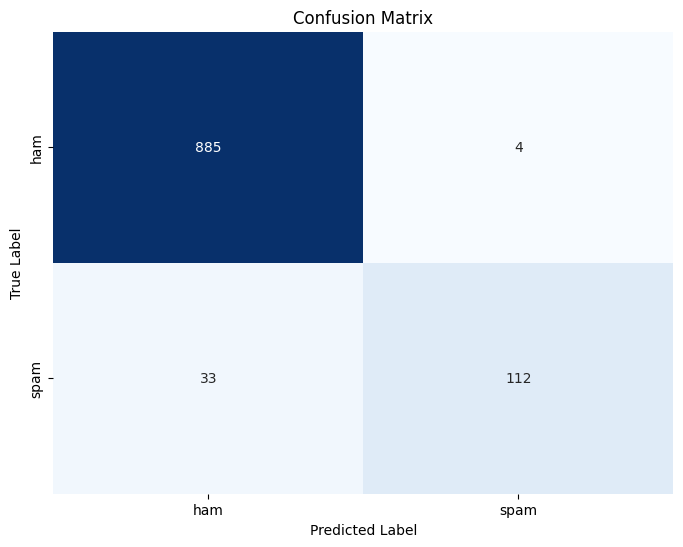

{'confusion_matrix': array([[885,   4],
        [ 33, 112]]),
 'accuracy': 0.9642166344294004,
 'precision': 0.9642577211413257,
 'recall': 0.9642166344294004,
 'f1_score': 0.9625158079160834}

In [53]:
classifier_bnb.fit(X_train, y_train)
evaluate_model(classifier_bnb, X_test, y_test)


# Vectorization using TfidfVectorizer   

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv= TfidfVectorizer()
X = tfv.fit_transform(sms['Transformed_msg']).toarray()
y=sms['Label']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Multinomial Naive Bayes

Confusion Matrix:
[[889   0]
 [ 41 104]]

Accuracy: 96.03%
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



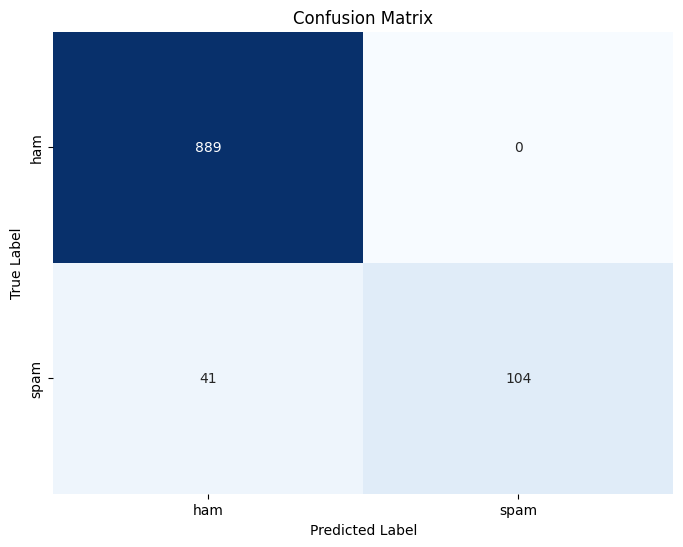

{'confusion_matrix': array([[889,   0],
        [ 41, 104]]),
 'accuracy': 0.960348162475822,
 'precision': 0.9620962542376407,
 'recall': 0.960348162475822,
 'f1_score': 0.9575305271390584}

In [55]:
classifier_mnb.fit(X_train, y_train)
evaluate_model(classifier_mnb, X_test, y_test)


# Gaussian Naive Bayes

Confusion Matrix:
[[787 102]
 [ 24 121]]

Accuracy: 87.81%
Precision: 0.91
Recall: 0.88
F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       889
           1       0.54      0.83      0.66       145

    accuracy                           0.88      1034
   macro avg       0.76      0.86      0.79      1034
weighted avg       0.91      0.88      0.89      1034



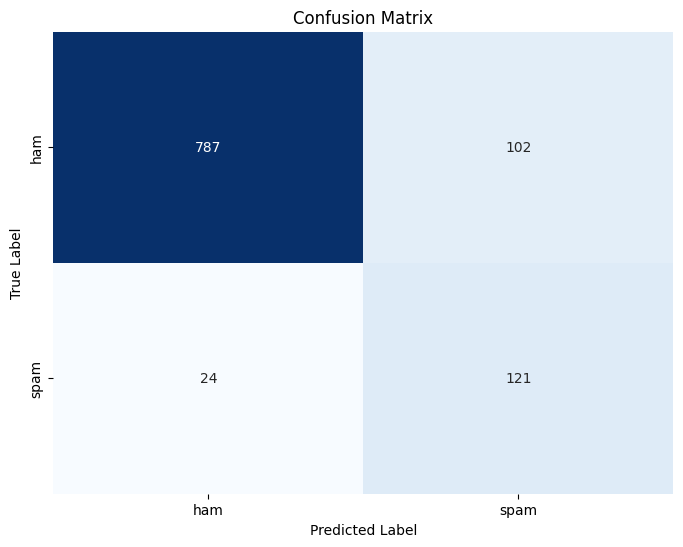

{'confusion_matrix': array([[787, 102],
        [ 24, 121]]),
 'accuracy': 0.8781431334622823,
 'precision': 0.9104147665756006,
 'recall': 0.8781431334622823,
 'f1_score': 0.8882617723735697}

In [56]:
classifier_gnb.fit(X_train,y_train)
evaluate_model(classifier_gnb, X_test, y_test)

# Bernoulli Naive Bayes

Confusion Matrix:
[[885   4]
 [ 33 112]]

Accuracy: 96.42%
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



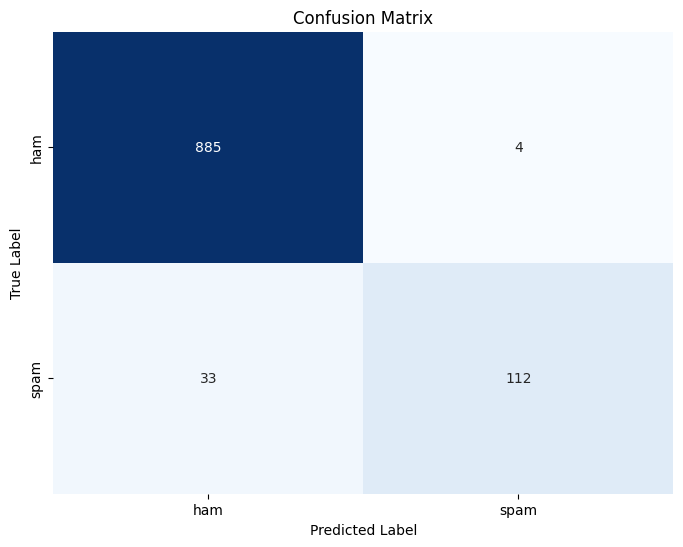

{'confusion_matrix': array([[885,   4],
        [ 33, 112]]),
 'accuracy': 0.9642166344294004,
 'precision': 0.9642577211413257,
 'recall': 0.9642166344294004,
 'f1_score': 0.9625158079160834}

In [57]:
classifier_bnb.fit(X_train, y_train)
evaluate_model(classifier_bnb, X_test, y_test)

# Saving the Model

In [59]:
import pickle

# Save the Vectorizer to a pickle file
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfv , file)                # tfidf vectroizer



# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier_mnb , file)





In [60]:
from google.colab import files

# Download the model.pkl file
files.download('model.pkl')

# Download the vectorizer.pkl file
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>